<Figure size 1000x600 with 0 Axes>

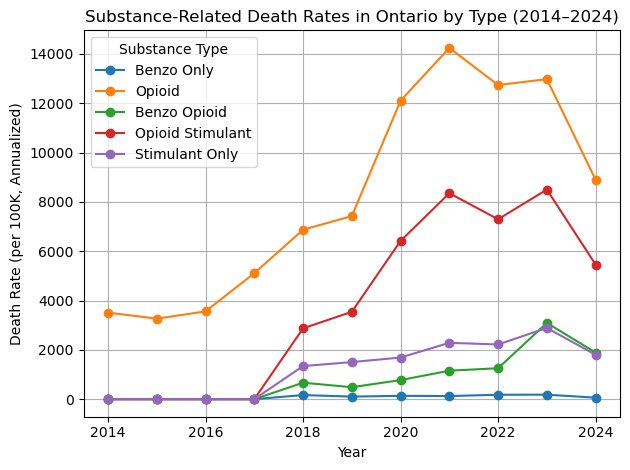

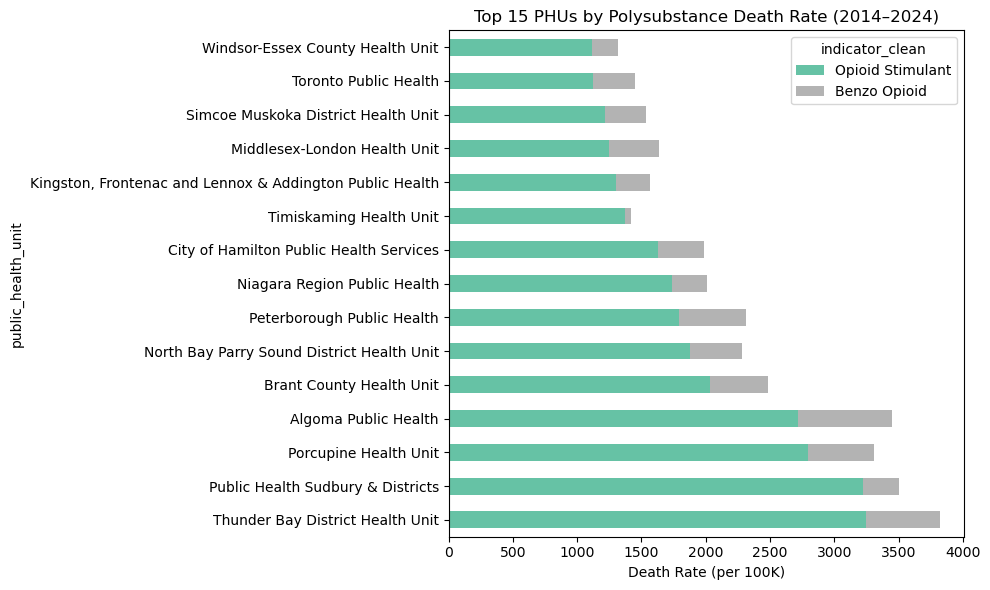

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("C://Users//shoaib//Desktop//Mental_health_ed_project//Cleaned_dataset//pho_ed_visits_phu_month_2014-2024.csv.csv")  # replace with your filename

# Normalize indicator field (lowercase + strip spaces)
df['indicator_clean'] = df['indicator'].str.lower().str.strip()

# Define substance death categories of interest
substance_indicators = {
    'opioid': 'deaths due to opioid toxicity',
    'opioid_stimulant': 'deaths due to opioid toxicity (with stimulant involvement)',
    'stimulant_only': 'deaths due to stimulant toxicity (without opioid involvement)',
    'benzo_opioid': 'deaths due to opioid toxicity (with benzodiazepine involvement)',
    'benzo_only': 'deaths due to benzodiazepine toxicity (without opioid involvement)'
}

# Filter to PHU-level only (exclude Ontario-wide aggregates)
df = df[df['public_health_unit'].str.lower() != 'ontario']

# Parse year from start date
df['year'] = pd.to_datetime(df['start_date_of_time_period'], errors='coerce').dt.year

# -----------------------------
# Trend Plot (Rate per 100K)
# -----------------------------
summary_rate = (
    df[df['indicator_clean'].isin(substance_indicators.values())]
    .groupby(['indicator_clean', 'year'])['cases_per_100_000_population_annualized']
    .sum()
    .reset_index()
)

# Pivot for plotting
pivot_rate = summary_rate.pivot(index='year', columns='indicator_clean', values='cases_per_100_000_population_annualized').fillna(0)

# Rename columns for clarity
pivot_rate = pivot_rate.rename(columns={v: k.replace("_", " ").title() for k, v in substance_indicators.items()})

# Plot trends over time
plt.figure(figsize=(10, 6))
pivot_rate.plot(marker='o')
plt.title("Substance-Related Death Rates in Ontario by Type (2014–2024)")
plt.ylabel("Death Rate (per 100K, Annualized)")
plt.xlabel("Year")
plt.grid(True)
plt.legend(title="Substance Type")
plt.tight_layout()
plt.show()

# -----------------------------
# PHU Breakdown (Top 15 PHUs by Polysubstance Deaths)
# -----------------------------
top_phus = (
    df[df['indicator_clean'].isin(substance_indicators.values())]
    .groupby(['public_health_unit', 'indicator_clean'])['cases_per_100_000_population_annualized']
    .sum()
    .reset_index()
)

# Pivot table
top_phus_pivot = top_phus.pivot(index='public_health_unit', columns='indicator_clean', values='cases_per_100_000_population_annualized').fillna(0)

# Rename for readability
top_phus_pivot = top_phus_pivot.rename(columns={v: k.replace("_", " ").title() for k, v in substance_indicators.items()})

# Filter top PHUs by Opioid Stimulant rates
top_subs = ['Opioid Stimulant', 'Benzo Opioid']
top_phus_sub = top_phus_pivot[top_subs].sort_values(by='Opioid Stimulant', ascending=False).head(15)

# Plot
top_phus_sub.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Top 15 PHUs by Polysubstance Death Rate (2014–2024)")
plt.xlabel("Death Rate (per 100K)")
plt.tight_layout()
plt.show()


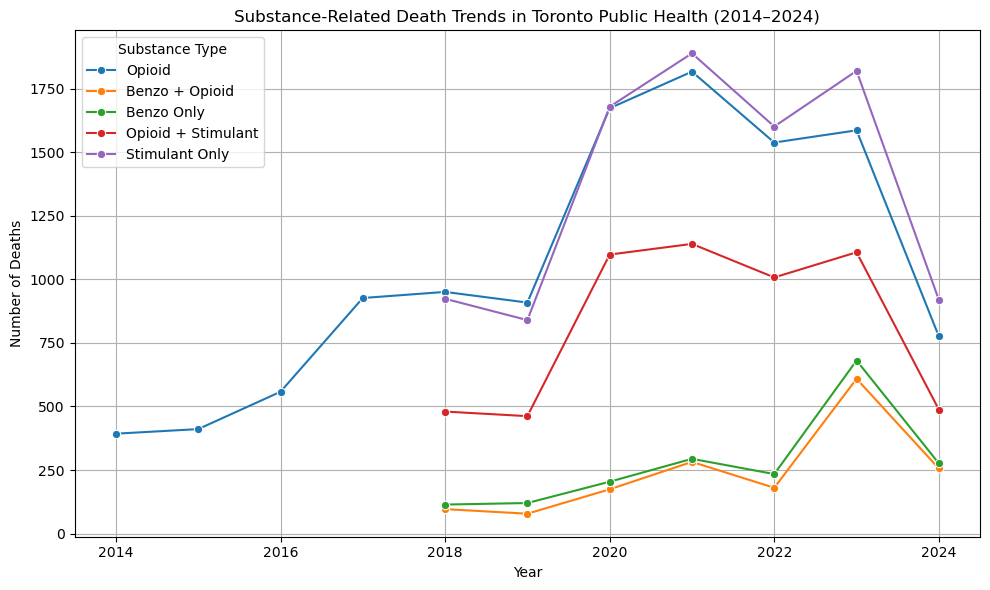

In [27]:
selected_phu = "Toronto Public Health"

# Filter data
df_phu = df[df["public_health_unit"].str.lower() == selected_phu.lower()].copy()

# Standardize indicator labels for grouping (adjust if needed)
indicator_mapping = {
    "Deaths due to opioid toxicity": "Opioid",
    "Deaths due to opioid toxicity (with stimulant involvement)": "Opioid + Stimulant",
    "Deaths due to opioid toxicity (with benzodiazepine involvement)": "Benzo + Opioid",
    "Deaths due to stimulant toxicity": "Stimulant Only",
    "Deaths due to stimulant toxicity (without opioid involvement)": "Stimulant Only",
    "Deaths due to benzodiazepine toxicity": "Benzo Only",
    "Deaths due to benzodiazepine toxicity (without opioid involvement)": "Benzo Only"
}
df_phu["indicator_clean"] = df_phu["indicator"].map(indicator_mapping)

# Convert time period to year
df_phu["year"] = pd.to_datetime(df_phu["start_date_of_time_period"]).dt.year

# Group and aggregate
df_summary = df_phu.groupby(["year", "indicator_clean"], as_index=False)["number_of_cases"].sum()

# -----------------------------
# 📊 Plotting
# -----------------------------
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_summary, x="year", y="number_of_cases", hue="indicator_clean", marker="o")
plt.title(f"Substance-Related Death Trends in {selected_phu} (2014–2024)")
plt.ylabel("Number of Deaths")
plt.xlabel("Year")
plt.legend(title="Substance Type")
plt.grid(True)
plt.tight_layout()
plt.show()

Error checking

In [17]:
import pandas as pd

# Load your dataset
file_path = "C://Users//shoaib//Desktop//Mental_health_ed_project//Cleaned_dataset//pho_ed_visits_phu_month_2014-2024.csv.csv" # Replace with your actual file path
df = pd.read_csv(file_path)

# Preview structure
print("Columns:", df.columns.tolist())
print("Sample data:")
print(df.head())

#  Check for missing values
print("\n Missing values per column:")
print(df.isnull().sum())

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#  Check unique years
if 'year' in df.columns:
    print("\n Unique years:", sorted(df['year'].unique()))
    print(" Year range: {} to {}".format(df['year'].min(), df['year'].max()))

# Unique substance types
if 'substance_type' in df.columns:
    print("\n Unique substance types:")
    print(df['substance_type'].dropna().unique())

# Unique PHUs
if 'public_health_unit' in df.columns:
    phu_counts = df['public_health_unit'].nunique()
    print(f"\n📍 Unique PHUs: {phu_counts}")
    print("✅ Sample PHUs:")
    print(df['public_health_unit'].dropna().unique()[:10])

#  Check for duplicates
duplicates = df.duplicated()
print(f"\n Duplicate rows: {duplicates.sum()}")

# 🧾 Check negative or zero death counts
if 'number_of_deaths' in df.columns:
    invalid_deaths = df[df['number_of_deaths'] <= 0]
    print(f"\n❌ Entries with zero or negative deaths: {len(invalid_deaths)}")
    print(invalid_deaths.head())

# 📊 Aggregate totals (optional sanity check)
if {'year', 'number_of_deaths'}.issubset(df.columns):
    summary = df.groupby('year')['number_of_deaths'].sum()
    print("\n📊 Total deaths per year:")
    print(summary)

# 🧼 Optional: check spelling issues in substance type
print("\n🔡 Normalized substance labels (sample):")
print(df['indicator'].str.lower().str.strip().value_counts().head())

# 🔁 Optional: pivot to check structure
if {'year', 'indicator', 'number_of_deaths'}.issubset(df.columns):
    pivot_check = df.pivot_table(index='year', columns='substance_type', values='number_of_deaths', aggfunc='sum')
    print("\n📐 Pivot table (deaths by substance per year):")
    print(pivot_check.head())




✅ Columns: ['public_health_unit', 'indicator', 'time_interval', 'time_period', 'start_date_of_time_period', 'end_date_of_time_period', 'number_of_cases', 'population', 'cases_per_100_000_population_annualized']
✅ Sample data:
  public_health_unit                                   indicator  \
0            Ontario  ED visits due to opioid-related poisonings   
1            Ontario  ED visits due to opioid-related poisonings   
2            Ontario  ED visits due to opioid-related poisonings   
3            Ontario  ED visits due to opioid-related poisonings   
4            Ontario  ED visits due to opioid-related poisonings   

  time_interval time_period start_date_of_time_period end_date_of_time_period  \
0       Monthly   2014 - 01                  1/1/2014               1/31/2014   
1       Monthly   2014 - 02                  2/1/2014               2/28/2014   
2       Monthly   2014 - 03                  3/1/2014               3/31/2014   
3       Monthly   2014 - 04              

In [23]:
df.dropna(how='all')


,public_health_unit,indicator,time_interval,time_period,start_date_of_time_period,end_date_of_time_period,number_of_cases,population,cases_per_100_000_population_annualized
0,Ontario,ED visits due to opioid-related poisonings,Monthly,2014 - 01,1/1/2014,1/31/2014,247.0,13564168.0,21.851690
1,Ontario,ED visits due to opioid-related poisonings,Monthly,2014 - 02,2/1/2014,2/28/2014,249.0,13573065.0,22.014188
2,Ontario,ED visits due to opioid-related poisonings,Monthly,2014 - 03,3/1/2014,3/31/2014,270.0,13581963.0,23.855167
3,Ontario,ED visits due to opioid-related poisonings,Monthly,2014 - 04,4/1/2014,4/30/2014,234.0,13590861.0,20.660943
4,Ontario,ED visits due to opioid-related poisonings,Monthly,2014 - 05,5/1/2014,5/31/2014,272.0,13599758.0,24.000427
...,...,...,...,...,...,...,...,...,...
42626,York Region Public Health,Deaths due to benzodiazepine toxicity (without...,Yearly,2020,1/1/2020,12/31/2020,2.0,1192038.0,0.167780
42627,York Region Public Health,Deaths due to benzodiazepine toxicity (without...,Yearly,2021,1/1/2021,12/31/2021,0.0,1205623.0,0.000000
42628,York Region Public Health,Deaths due to benzodiazepine toxicity (without...,Yearly,2022,1/1/2022,12/31/2022,2.0,1219986.0,0.163936
42629,York Region Public Health,Deaths due to benzodiazepine toxicity (without...,Yearly,2023,1/1/2023,12/31/2023,3.0,1239902.0,0.241955


analysis 2


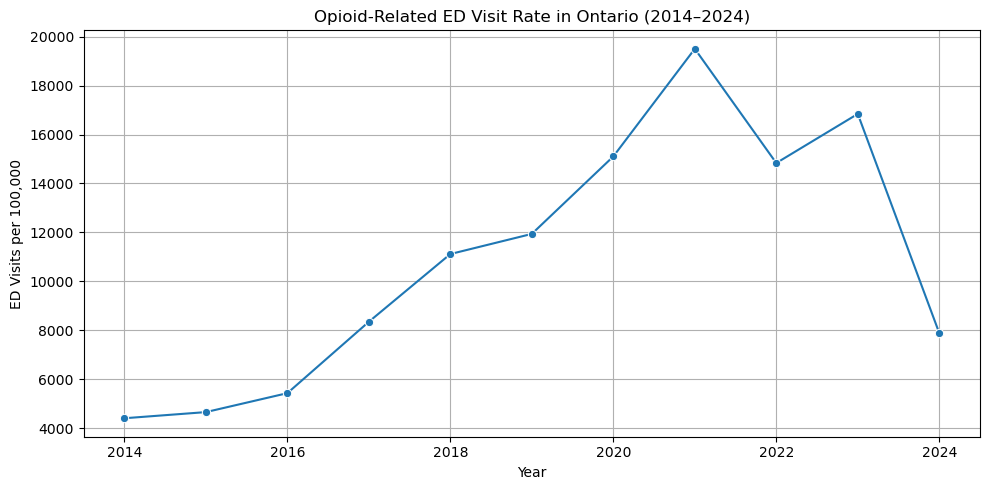

C:\Users\shoaib\AppData\Local\Temp\ipykernel_18980\3444133821.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_annual, x='year', y='pct_change', palette='coolwarm')


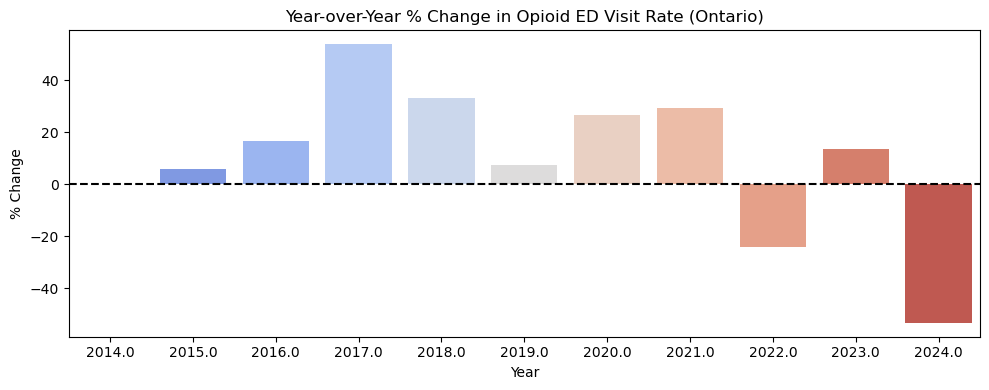

📈 Peak opioid-related ED rate: 19504.13 per 100K in 2021.0


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# STEP 1: Load the dataset
# ---------------------------
# Replace with your actual filename
df = pd.read_csv("C://Users//shoaib//Desktop//Mental_health_ed_project//Cleaned_dataset//pho_ed_visits_phu_month_2014-2024.csv.csv")




# -----------------------------------------
# STEP 2: Clean + Prepare
# -----------------------------------------
# Ensure date is parsed
df['start_date_of_time_period'] = pd.to_datetime(df['start_date_of_time_period'])

# Extract year from date
df['year'] = df['start_date_of_time_period'].dt.year

# Group by year (Ontario only)
df_annual = df.groupby('year').agg({
    'number_of_cases': 'sum',
    'population': 'mean'  # population is static for each month, so avg = actual
}).reset_index()

# Calculate annual rate per 100K
df_annual['rate_per_100k'] = (df_annual['number_of_cases'] / df_annual['population']) * 100000
df_annual['pct_change'] = df_annual['rate_per_100k'].pct_change() * 100

# -----------------------------------------
# STEP 3: Plot ED Visit Rate Over Time
# -----------------------------------------
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_annual, x='year', y='rate_per_100k', marker='o')
plt.title('Opioid-Related ED Visit Rate in Ontario (2014–2024)')
plt.ylabel('ED Visits per 100,000')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------
# STEP 4: Plot Year-over-Year Change
# -----------------------------------------
plt.figure(figsize=(10, 4))
sns.barplot(data=df_annual, x='year', y='pct_change', palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Year-over-Year % Change in Opioid ED Visit Rate (Ontario)')
plt.ylabel('% Change')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

# -----------------------------------------
# STEP 5: Summary
# -----------------------------------------
peak_year = df_annual.loc[df_annual['rate_per_100k'].idxmax(), 'year']
peak_value = df_annual['rate_per_100k'].max()
print(f"📈 Peak opioid-related ED rate: {peak_value:.2f} per 100K in {peak_year}")

In [7]:
# ---------------------------------------------
# 1. Check crude rate calculation consistency
# ---------------------------------------------
df_annual['rate_check'] = (df_annual['number_of_cases'] / df_annual['population']) * 100000
rate_diff = (df_annual['rate_check'] - df_annual['rate_per_100k']).abs()
print("⚠️ Rate mismatches (diff > 0.1):")
print(df_annual[rate_diff > 0.1][['year', 'rate_per_100k', 'rate_check']])

# ---------------------------------------------
# 2. Check for missing or duplicate years
# ---------------------------------------------
expected_years = list(range(2014, 2025))
actual_years = df_annual['year'].tolist()
missing = set(expected_years) - set(actual_years)
duplicates = df_annual['year'].duplicated().sum()
print(f"✅ Year range check: Missing years = {missing}, Duplicates = {duplicates}")

# ---------------------------------------------
# 3. Identify sharp jumps or drops in % change
# ---------------------------------------------
df_annual['abs_pct_change'] = df_annual['pct_change'].abs()
print("⚠️ Large year-over-year % changes (>|30%|):")
print(df_annual[df_annual['abs_pct_change'] > 30][['year', 'pct_change']])

# ---------------------------------------------
# 4. Check if population is constant (sanity)
# ---------------------------------------------
pop_std = df_annual['population'].std()
if pop_std < 1:
    print("✅ Population appears constant across years (good)")
else:
    print("⚠️ Population varies — confirm values by year")


⚠️ Rate mismatches (diff > 0.1):
Empty DataFrame
Columns: [year, rate_per_100k, rate_check]
Index: []
✅ Year range check: Missing years = set(), Duplicates = 0
⚠️ Large year-over-year % changes (>|30%|):
      year  pct_change
3   2017.0   53.716492
4   2018.0   33.144118
10  2024.0  -53.165166
⚠️ Population varies — confirm values by year


<Axes: title={'center': 'Population by Year (Ontario)'}, xlabel='year'>

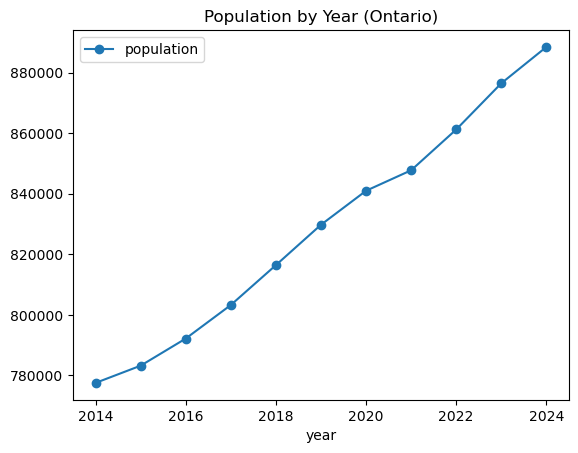

In [9]:
df_annual[['year', 'population']].plot(x='year', y='population', marker='o', title='Population by Year (Ontario)')
